<div class="table-of-contents" style="background-color:#3dec84; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1>TOC</h1>
  <ol>
    <li><a href="#overview" style="color: blue;">1. Overview</a></li>
    <li><a href="#imports" style="color: blue;">2. Imports</a></li>
      <li><a href="#LoadData" style="color: blue;">3. Load Data</a></li>
    <li><a href="#EDA" style="color: blue;">4. EDA</a></li>
    <li><a href="#FeatureSelection" style="color: blue;">5. Feature Selection</a></li>
    <li><a href="#ModelImplementation" style="color: blue;">6. Model Implementation</a></li>
    <li><a href="#Evaluation" style="color: blue;">7. Evaluation</a></li>
    <li><a href="#SklearnImplementation" style="color: blue;">8. Sklearn Implementation</a></li>
    <li><a href="#Conclusion" style="color: blue;">9. Conclusion</a></li>
    <li><a href="#ThankYou" style="color: blue;">10. Thank You</a></li>
  </ol>
</div>


<a id="overview"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Overview</center></h1>

# Overview
**Previously we've implemented our first Clustering Algorithm [KMeans](https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch)**

**In this notebook we'll be implementing our second classification algorithm Decision Tree**

**Let's get started**    

<a id="imports"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Imports</center></h1>



In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint 

<a id="LoadData"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Loading Data</center></h1>



In [2]:
df = pd.read_csv('../breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id="EDA"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>EDA</center></h1>
    


In [6]:
px.pie(df, 'diagnosis', color='diagnosis',color_discrete_sequence=['#007500','#5CFF5C'],title='Data Distribution')


## From this plot we conclude that:
* **Data isn't balanced, accuracy wont be a good evaluation metric for this dataset**

In [7]:
for column in df.drop('diagnosis',axis=1).columns[:5]:
    fig = px.box(data_frame=df,x='diagnosis',color='diagnosis',y=column,color_discrete_sequence=['#007500','#5CFF5C'],orientation='v')
    fig.show()        


In [8]:
for column in  df.drop('diagnosis',axis=1).columns[5:10]:
    fig = px.scatter(data_frame=df,color='diagnosis',x=column,color_discrete_sequence=['#007500','#5CFF5C'],)
    fig.show()        


## Checking Correlation with the target

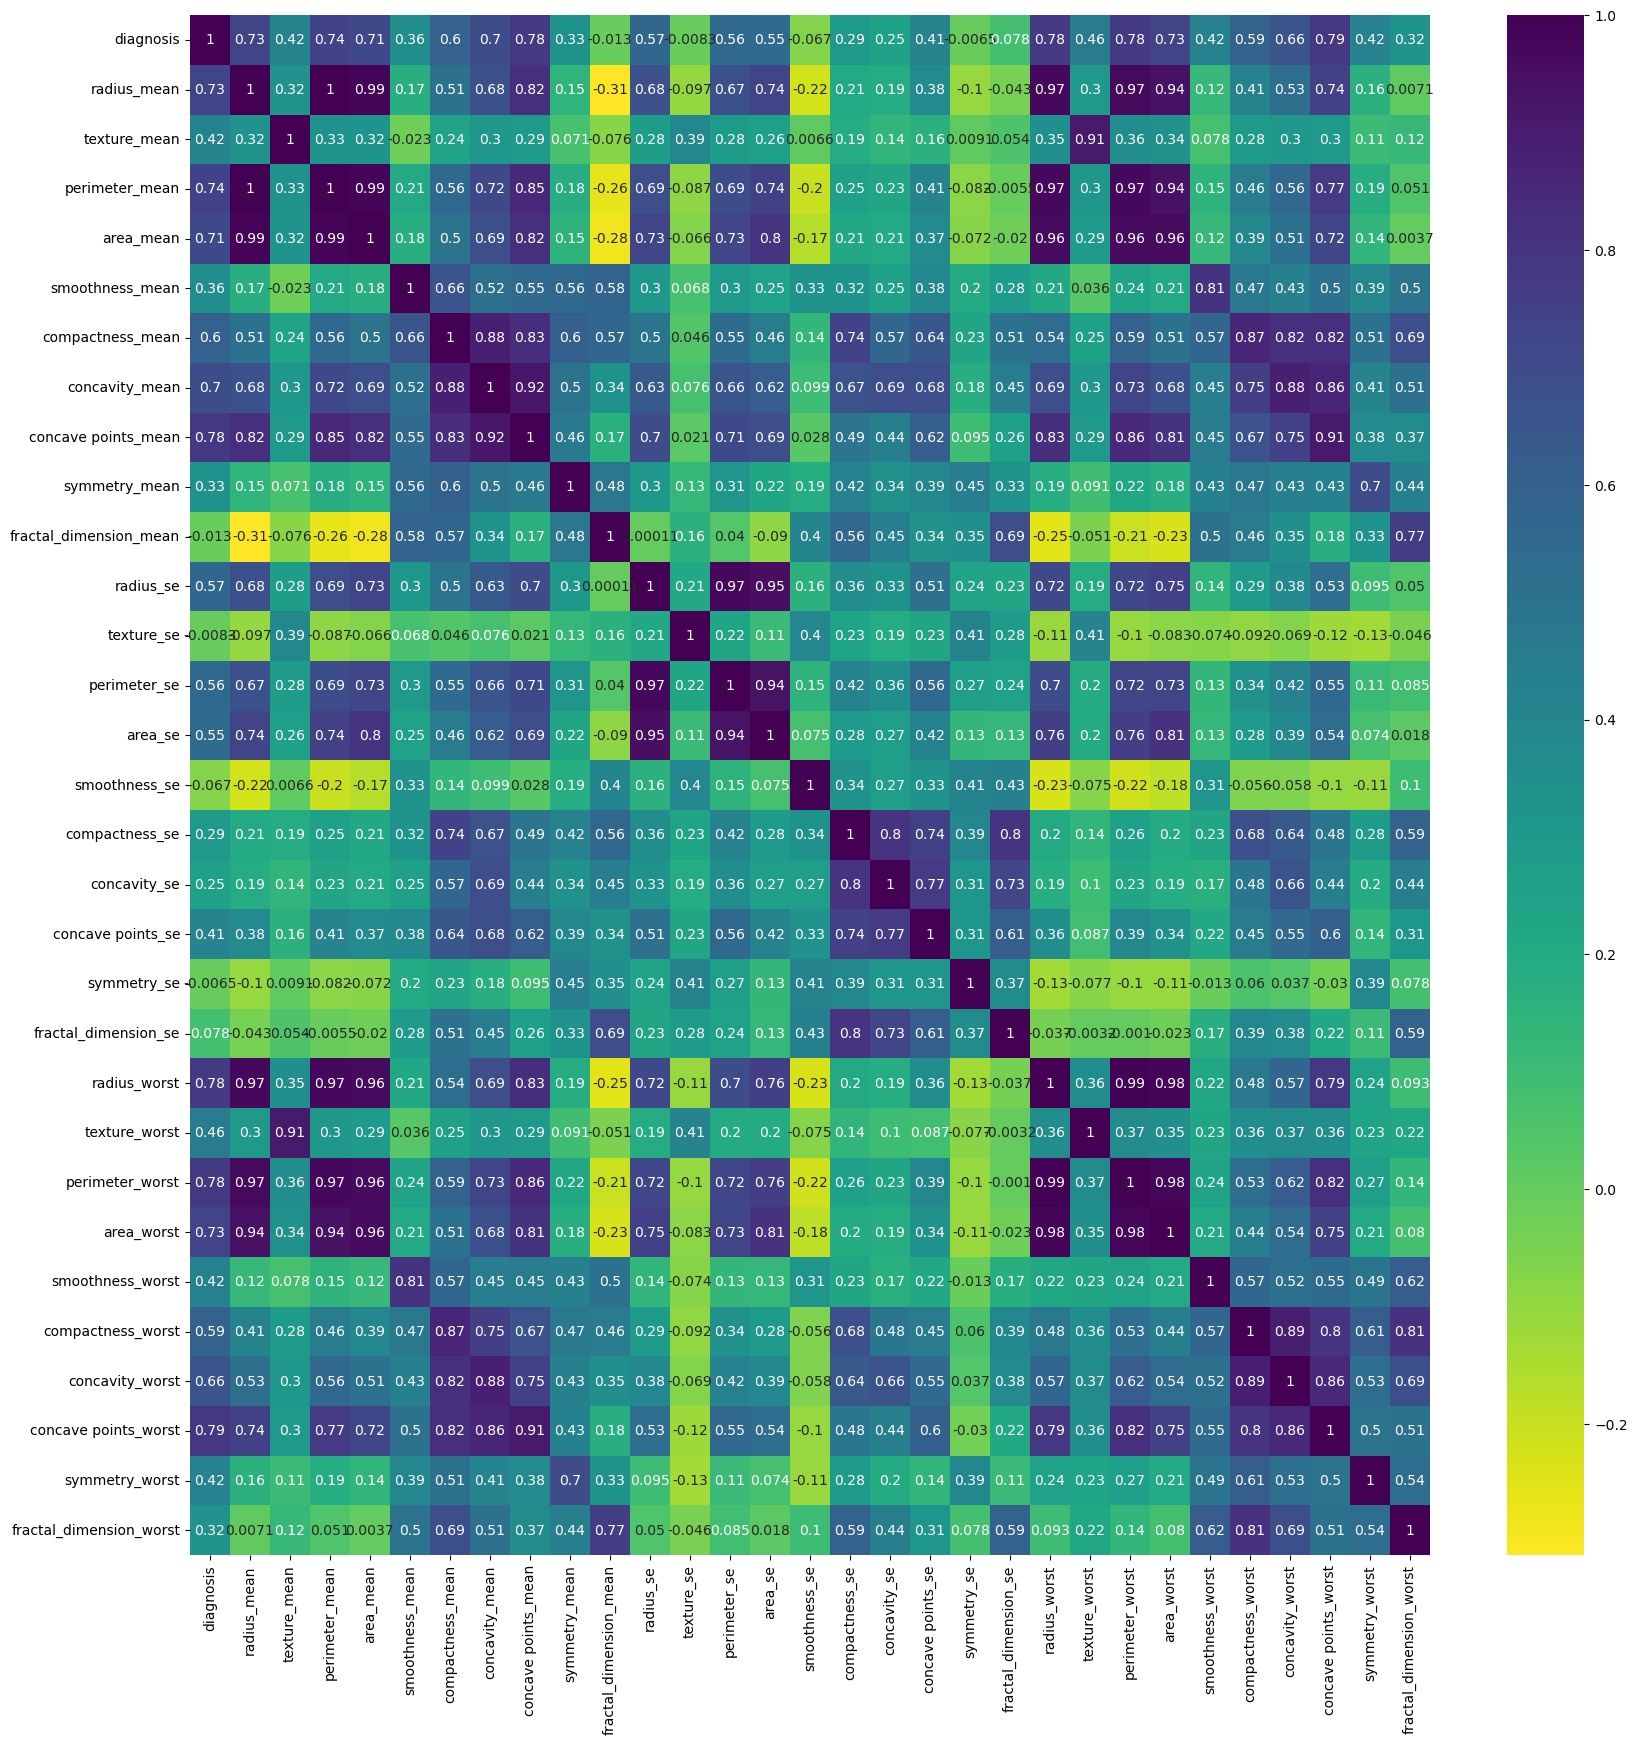

In [9]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

## From this plot we conclude that:
* **Some features aren't correlated with the target maybe we should remove them**

<a id="FeatureSelection"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Feature Selection</center></h1>

# Feature Selection


In [10]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.99)
relevant_features = cor_target[cor_target>0.25]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')
# Display the results
pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


**Assign trainning data and training labels**

In [11]:
X = df[names].values
y = df['diagnosis'].values.reshape(-1,1)

In [12]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std

    return X

In [13]:
X = scale(X)

<a id="ModelImplementation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Model Implementation</center></h1>

# Model Implementation


# How the algorithm works

**We'll start with all examples at the root node then:**

**We'll calculate information gain for splitting on all possible features and pick the one with the highest value**

**Then we'll split the data according to the selected feature**

**We'll repeat this  process until stopping criteria is met**

## Key Points:

### Entropy
**Entropy function which is a way to measure impurity**

**Entropy is represented by this function**
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i} 
$$

**Where $(p_1)$ is the fraction of examples that are a certain class**


### Information Gain

**Information gain is the reduction in entropy when he make a split**

**Recall that our goal is to choose the split that gives the highest information gain, information gain equation =**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**where** 
- $H(p_1^\text{node})$ is entropy at the node 
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively



## Start the Implementation


### Node Class

In [14]:
class Node():
    """
    A class representing a node in a decision tree.
    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        """
        Initializes a new instance of the Node class.

        Args:
            feature: The feature used for splitting at this node. Defaults to None.
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None.
            right: The right child node. Defaults to None.
            gain: The gain of the split. Defaults to None.
            value: If this node is a leaf node, this attribute represents the predicted value
                for the target variable. Defaults to None.
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value


### DecisionTree Class

In [15]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=2, max_depth=2):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        # Create empty arrays to store the left and right datasets
        left_dataset = []
        right_dataset = []
        
        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            entropy (float): Entropy of the given label values.
        """
        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples) / len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)

        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            information_gain (float): Information gain of the split.
        """
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy 
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain 
        information_gain = parent_entropy - weighted_entropy
        return information_gain

    
    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain, 
              left and right datasets.
        """
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split

    
    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value
    
    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)
    
    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)  
        self.root = self.build_tree(dataset)

    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
    
    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None: 
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

<a id="Evaluation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Evaluation</center></h1>

# Evaluation


In [16]:
def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [17]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

In [18]:
def balanced_accuracy(y_true, y_pred):
    """Calculate the balanced accuracy for a multi-class classification problem.

    Parameters
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns
    -------
        balanced_acc : The balanced accuracyof the model
        
    """
    y_pred = np.array(y_pred)
    y_true = y_true.flatten()
    # Get the number of classes
    n_classes = len(np.unique(y_true))

    # Initialize an array to store the sensitivity and specificity for each class
    sen = []
    spec = []
    # Loop over each class
    for i in range(n_classes):
        # Create a mask for the true and predicted values for class i
        mask_true = y_true == i
        mask_pred = y_pred == i

        # Calculate the true positive, true negative, false positive, and false negative values
        TP = np.sum(mask_true & mask_pred)
        TN = np.sum((mask_true != True) & (mask_pred != True))
        FP = np.sum((mask_true != True) & mask_pred)
        FN = np.sum(mask_true & (mask_pred != True))

        # Calculate the sensitivity (true positive rate) and specificity (true negative rate)
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)

        # Store the sensitivity and specificity for class i
        sen.append(sensitivity)
        spec.append(specificity)
    # Calculate the balanced accuracy as the average of the sensitivity and specificity for each class
    average_sen =  np.mean(sen)
    average_spec =  np.mean(spec)
    balanced_acc = (average_sen + average_spec) / n_classes

    return balanced_acc

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [20]:
#create model instance
model = DecisionTree(2, 2)

# Fit the decision tree model to the training data.
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
predictions = model.predict(X_test)

# Calculate evaluating metrics
print(f"Model's Accuracy: {accuracy(y_test, predictions)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy(y_test, predictions)}")

Model's Accuracy: 0.9557522123893806
Model's Balanced Accuracy: 0.9601027397260273


<a id=" SklearnImplementation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Sklearn Implementation</center></h1>

#  Sklearn Implementation


In [21]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier model object.
decision_tree_classifier = DecisionTreeClassifier()

# Train the decision tree classifier model using the training data.
decision_tree_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
predictions = decision_tree_classifier.predict(X_test)

# Calculate evaluating metrics
print(f" Model's Accuracy: {accuracy(y_test, predictions)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy(y_test, predictions)}")

 Model's Accuracy: 0.9469026548672567
Model's Balanced Accuracy: 0.9476027397260274


<a id=" Conclusion"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center> Conclusion</center></h1>

# Conclusion

**We were able to implement decision trees from scratch and using sklearn library**



**We have tried several models on this dataset in this [notebook](https://www.kaggle.com/code/fareselmenshawii/breast-cancer-various-ml-models)**

**we could try ensemble trees for better results, we've discussed that in this [notebook](https://www.kaggle.com/code/fareselmenshawii/random-forest-classifier-from-scratch)**

<a id="ThankYou"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center> Thank you</center></h1>

# Thank you


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**


<div style="padding:10px; 
            color:#333333;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style:solid;
            border-color:#666666;
            background-color:#F9F9F9;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Machine Learning From Scratch Series</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/linear-regression-from-scratch" style="color:#0072B2">1 - Linear Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch" style="color:#0072B2">2 -  Logistic Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch" style="color:#0072B2">3 - KMeans</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/decision-tree-classifier-from-scratch" style="color:#0072B2">4 - Decision Trees</a>
        </li> 
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/random-forest-classifier-from-scratch" style="color:#0072B2">5 -  Random Forest</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/knn-from-scratch" style="color:#0072B2">6 - KNearestNeighbor</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/pca-from-scratch?scriptVersionId=121402593" style="color:#0072B2">7 - PCA</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/svm-from-scratch" style="color:#0072B2">8 - SVM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/naive-bayes-from-scratch" style="color:#0072B2">9 - Naive Baye</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/optimized-neural-network-from-scratch" style="color:#0072B2">10 - Optimized Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch" style="color:#0072B2">11 - Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/cnn-from-scratch" style="color:#0072B2">12 - CNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/rnn-from-scratch" style="color:#0072B2">13 - RNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/lstm-from-scratch" style="color:#0072B2">14 - LSTM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/gru-from-scratch" style="color:#0072B2">15 - GRU</a>
        </li>
    </ul>
</div>